In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
#Importing Data from CSV file
data=pd.read_csv("fer2013.csv")

In [4]:
labels=data.iloc[:,[0]].values

In [5]:
pixels=data['pixels']

In [6]:
#Facial Expressions
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [7]:
#converting pixels to Gray Scale images of 48X48 
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')

'Disgust'

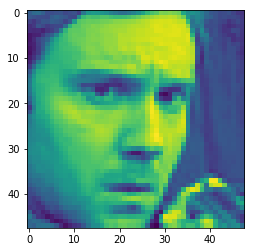

In [20]:
plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

In [9]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [10]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [12]:
classes=7
model = create_convolutional_model(classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
__________

In [13]:
#train the CNN 
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=2)

Epoch 1/30
 - 351s - loss: 1.8771 - acc: 0.3336
Epoch 2/30
 - 331s - loss: 1.4872 - acc: 0.4378
Epoch 3/30
 - 340s - loss: 1.3179 - acc: 0.4962
Epoch 4/30
 - 295s - loss: 1.2223 - acc: 0.5325
Epoch 5/30
 - 278s - loss: 1.1482 - acc: 0.5660
Epoch 6/30
 - 338s - loss: 1.0802 - acc: 0.5927
Epoch 7/30
 - 341s - loss: 1.0177 - acc: 0.6195
Epoch 8/30
 - 304s - loss: 0.9559 - acc: 0.6378
Epoch 9/30
 - 299s - loss: 0.8736 - acc: 0.6744
Epoch 10/30
 - 279s - loss: 0.8038 - acc: 0.7065
Epoch 11/30
 - 276s - loss: 0.7289 - acc: 0.7297
Epoch 12/30
 - 287s - loss: 0.6422 - acc: 0.7638
Epoch 13/30
 - 271s - loss: 0.6035 - acc: 0.7809
Epoch 14/30
 - 281s - loss: 0.5472 - acc: 0.7956
Epoch 15/30
 - 290s - loss: 0.4330 - acc: 0.8437
Epoch 16/30
 - 278s - loss: 0.3821 - acc: 0.8645
Epoch 17/30
 - 296s - loss: 0.3535 - acc: 0.8740
Epoch 18/30
 - 314s - loss: 0.3142 - acc: 0.8882
Epoch 19/30
 - 279s - loss: 0.2834 - acc: 0.8993
Epoch 20/30
 - 285s - loss: 0.2484 - acc: 0.9118
Epoch 21/30
 - 290s - loss: 0

In [19]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Normalized confusion matrix
[[4.66181061e-01 4.16233091e-03 9.15712799e-02 1.03017690e-01
  1.76899063e-01 2.28928200e-02 1.35275754e-01]
 [1.69811321e-01 3.67924528e-01 7.54716981e-02 1.32075472e-01
  1.32075472e-01 1.88679245e-02 1.03773585e-01]
 [1.05367793e-01 2.98210736e-03 3.57852883e-01 1.00397614e-01
  2.08747515e-01 9.54274354e-02 1.29224652e-01]
 [2.23189984e-02 0.00000000e+00 1.63309744e-02 8.26891671e-01
  5.06260207e-02 1.36091453e-02 7.02231900e-02]
 [9.99206979e-02 7.93021412e-04 8.96114195e-02 9.75416336e-02
  5.22601110e-01 9.51625694e-03 1.80015860e-01]
 [3.75469337e-02 0.00000000e+00 7.88485607e-02 8.51063830e-02
  3.12891114e-02 7.22152691e-01 4.50563204e-02]
 [8.02980132e-02 1.65562914e-03 5.21523179e-02 1.20033113e-01
  1.54801325e-01 1.65562914e-02 5.74503311e-01]]


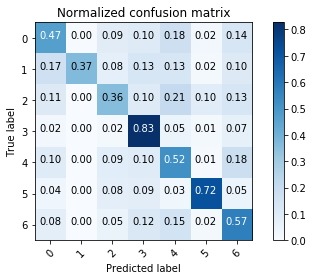

In [20]:
#making confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [17]:
#Save the weights
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)

In [13]:
#Save the weights
filename='model_weights.hdf5'
model.load_weights(filename)

In [14]:
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

In [15]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("/home/udaram/Downloads/haarcascade_frontalface_default.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret,img=cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

In [21]:
face_in_video()